# Exploratory Data Analysis (EDA)

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
%matplotlib inline

import statsmodels.api as sm
import scipy

def set_plotting_style():
    sns.set_context('paper')  # Set context to 'paper'
    sns.set_style('whitegrid')  # Set style to 'whitegrid'
    sns.set_palette('colorblind')  # Set palette to 'colorblind'
    plt.rcParams['figure.figsize'] = (10, 6)  # Adjust figure size
    plt.rcParams['font.size'] = 14  # Adjust font size
    plt.rcParams['axes.labelsize'] = 14  # Adjust label size
    plt.rcParams['axes.titlesize'] = 18  # Adjust title size

set_plotting_style()

import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define file paths
base_dir = r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\Processed'
train_file = 'train_cleaned.csv'
test_file = 'test_cleaned.csv'

# Construct full file paths
train_file_path = os.path.join(base_dir, train_file)
test_file_path = os.path.join(base_dir, test_file)

# Load the data with error handling
try:
    train_tka = pd.read_csv(train_file_path)
    test_tka = pd.read_csv(test_file_path)
except FileNotFoundError:
    print(f"File not found. Please check the file paths.")
except Exception as e:
    print(f"An error occurred: {e}")

In [3]:
# Create a ProfileReport
profile = ydata_profiling.ProfileReport(train_tka, title='Pandas Profiling Report', explorative=True)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate Analysis

### Continuous Variables

In [4]:
# Visualize the float variables using hitograms with 10 bins
def plot_float_variables(df, variables):
    for var in variables:
        sns.histplot(df[var], bins=15, kde=False)
        plt.title(f'The Distribution of {var}', loc='left')
        plt.xlabel(f'{var}')
        plt.ylabel('Frequency')
        sns.despine(left=True, bottom=True)  # Remove the top, right, left and bottom spines from plot
        plt.show()
        plt.close()
    return None
    # return df[var].hist(bins=10)
    # return df[var].plot.hist(bins=10)
    # return df[var].plot.hist(bins=10, figsize=(10, 5))
    # return df[var].plot.hist(bins=10, figsize=(10, 5), title=f'Histogram of {var}')
    # return df[var].plot.hist(bins=10, figsize=(10, 5), title=f'Histogram of {var}', xlabel=f'{var}', ylabel='Frequency')
    # return df[var].plot.hist(bins=10, figsize=(10, 5), title=f'Histogram of {var}', xlabel=f'{var}', ylabel='Frequency', color='blue')
    # return df[var].plot.hist(bins=10, figsize=(10, 5), title=f'Histogram of {var}', xlabel=f'{var}', ylabel='Frequency', color='blue', alpha=0.5)
    

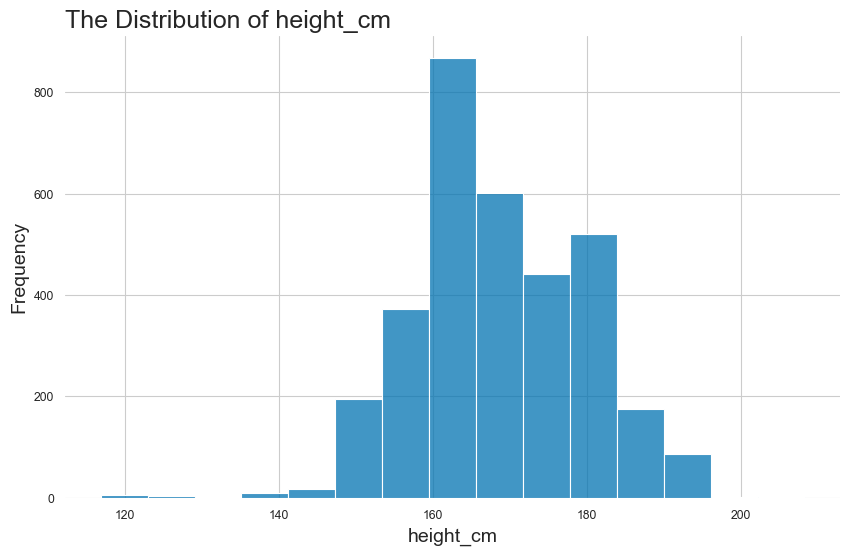

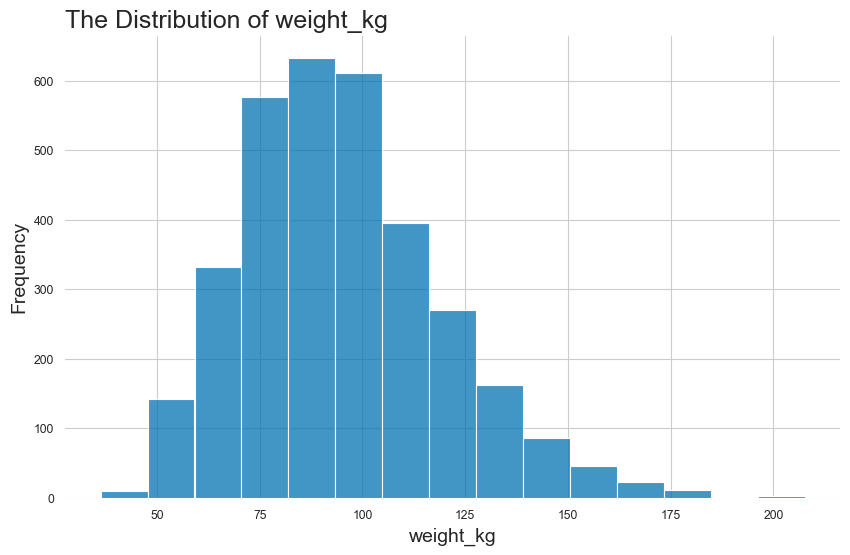

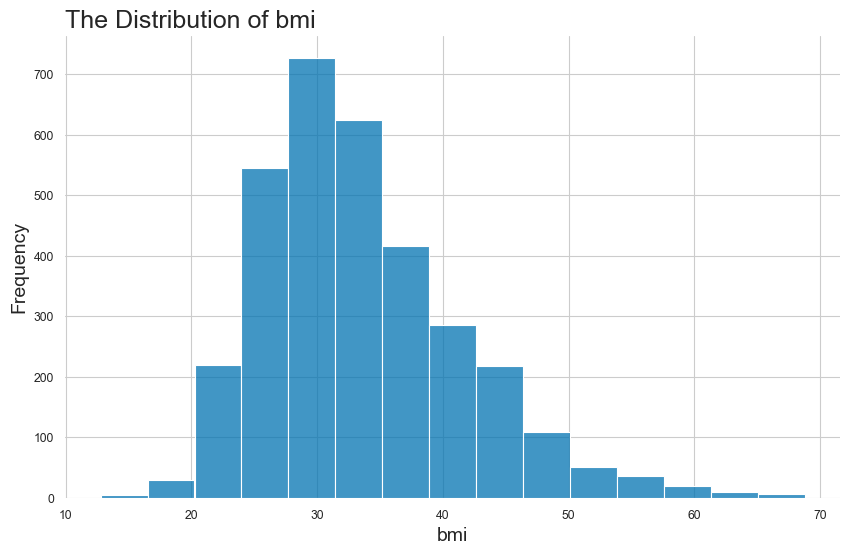

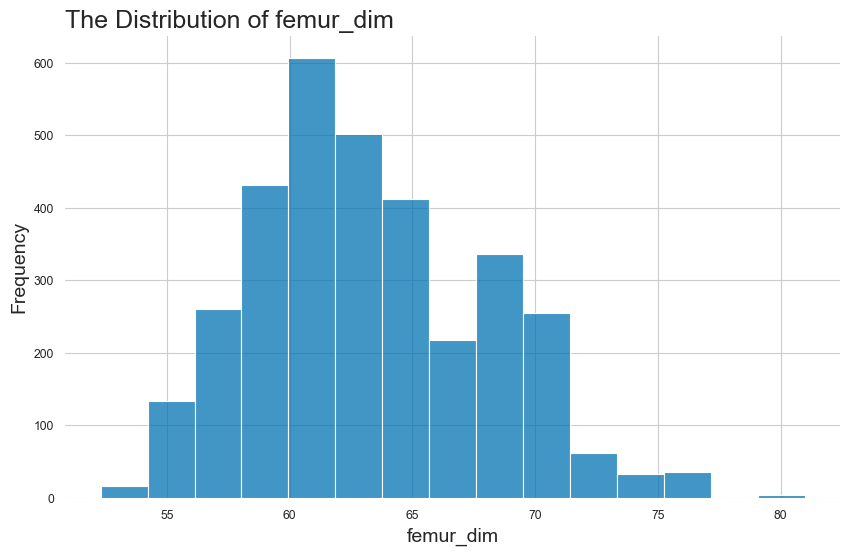

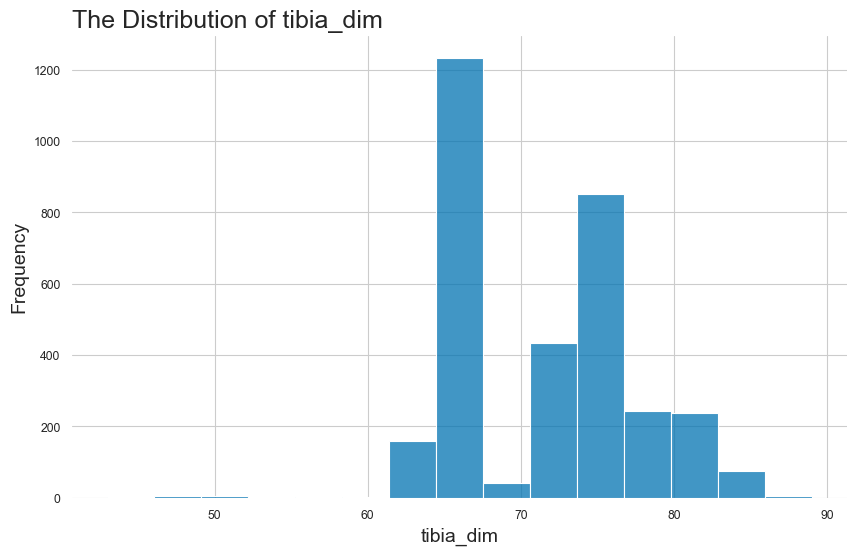

In [5]:
# Define the continuous variables
num_vars = ['height_cm', 'weight_kg', 'bmi', 'femur_dim', 'tibia_dim']

# Call the function to plot the continuous variable
plot_float_variables(train_tka, num_vars)

### Categorical Variables

In [6]:
# Countplot for Categorical Variables
def plot_categorical_variables(df, variables, mappings):
    for var in variables:
        # Create a copy of the DataFrame
        df_copy = df.copy()

        # Replace the encoded values with their original names
        df_copy[var] = df_copy[var].map(mappings[var])

        # Create the bar plot
        sns.countplot(x=var, data=df_copy)
        plt.title(f'The Distribution of {var}', loc='left')
        plt.xlabel(f'{var}')
        plt.ylabel('Count')
        sns.despine()  # Remove the top and right spines from plot
        plt.show()
        plt.close()
    return None

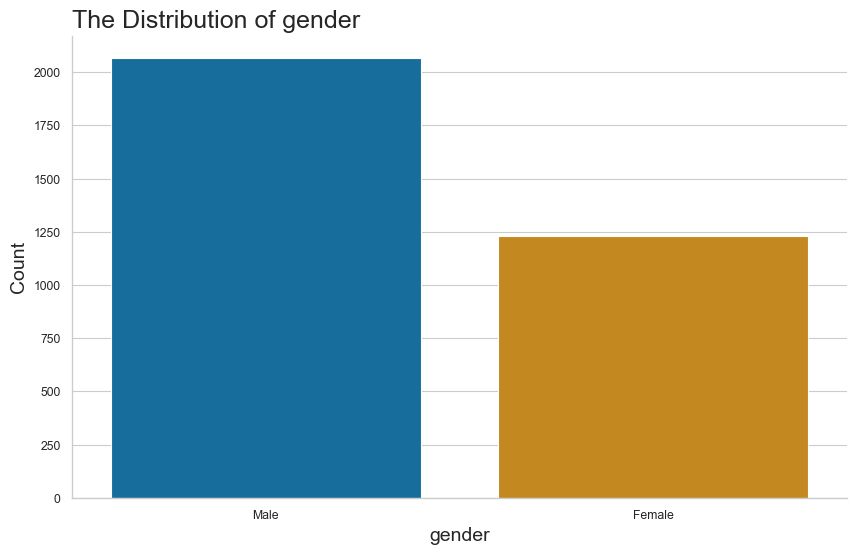

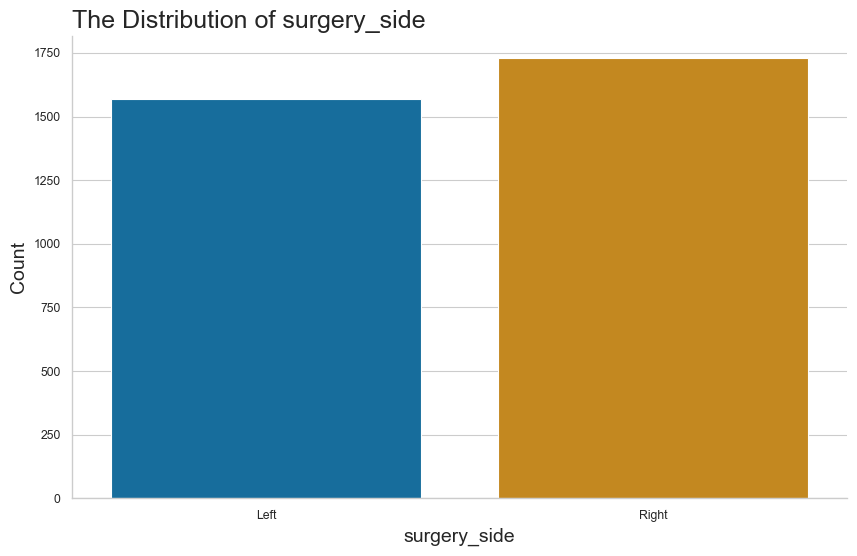

In [7]:
# Define the categorical variables
cat_vars = ['gender', 'surgery_side']

# Define the mappings for the encoded values
mappings = {
    'gender': {0: 'Male', 1: 'Female'},
    'surgery_side': {0: 'Left', 1: 'Right'}
}

# Call the function
plot_categorical_variables(train_tka, ['gender', 'surgery_side'], mappings)

## Bivariate Analysis

### Continuous-Continuous Variables

In [8]:
from scipy.stats import pearsonr

def plot_regression_and_test_hypothesis(df, features, targets):
    for target in targets:
        for feature in features:
            # Create the regression plot
            sns.regplot(x=feature, y=target, data=df)
            plt.title(f'Regression plot of {feature} vs {target}', loc='left')
            sns.despine(left=True, bottom=True)  # Remove the top, bottom, right and left spines from plot
            plt.show()

            # Perform the Pearson correlation test
            correlation, p_value = pearsonr(df[feature], df[target])

            # Print the results
            print(f'Pearson correlation between {feature} and {target}: {correlation:.3f}')
            print(f'p-value: {p_value:.3f}')

            # Give inferences
            if p_value < 0.05:
                print(f'There is a statistically significant relationship between {feature} and {target}.')
            else:
                print(f'There is no statistically significant relationship between {feature} and {target}.')

            print('\n')

            plt.close()
    return None

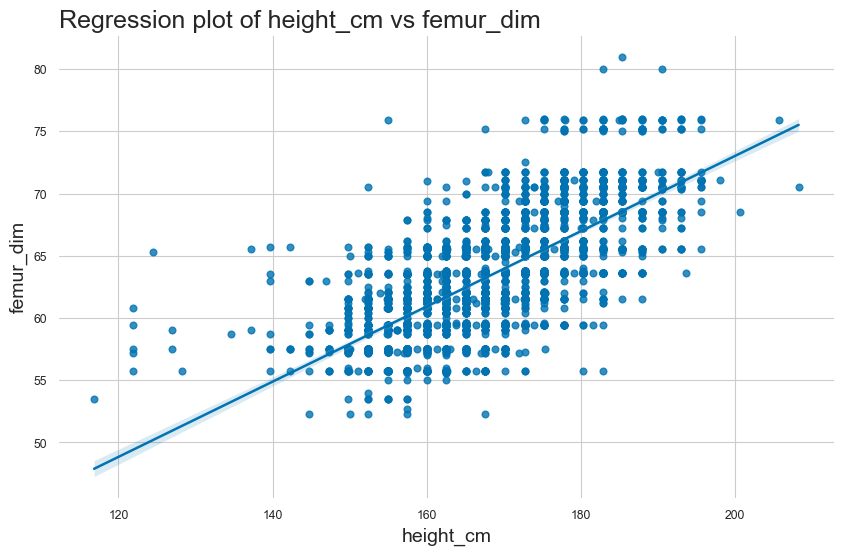

Pearson correlation between height_cm and femur_dim: 0.707
p-value: 0.000
There is a statistically significant relationship between height_cm and femur_dim.




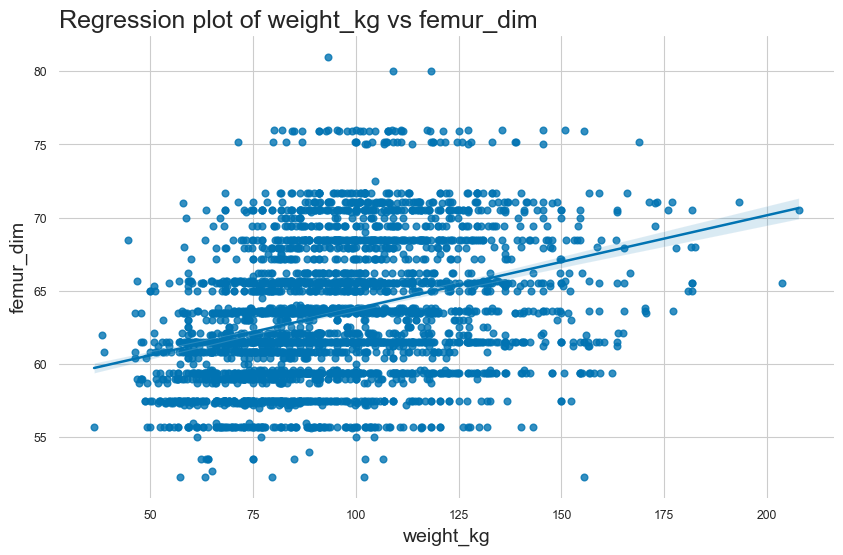

Pearson correlation between weight_kg and femur_dim: 0.333
p-value: 0.000
There is a statistically significant relationship between weight_kg and femur_dim.




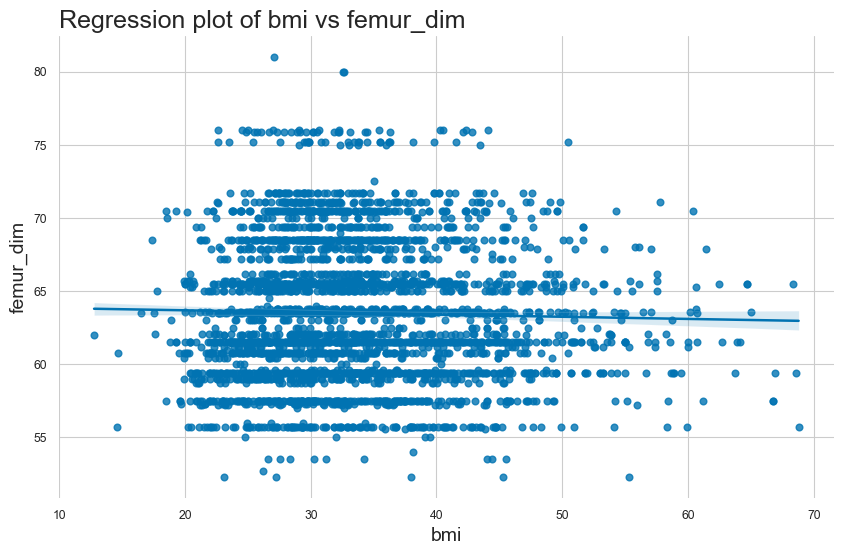

Pearson correlation between bmi and femur_dim: -0.026
p-value: 0.142
There is no statistically significant relationship between bmi and femur_dim.




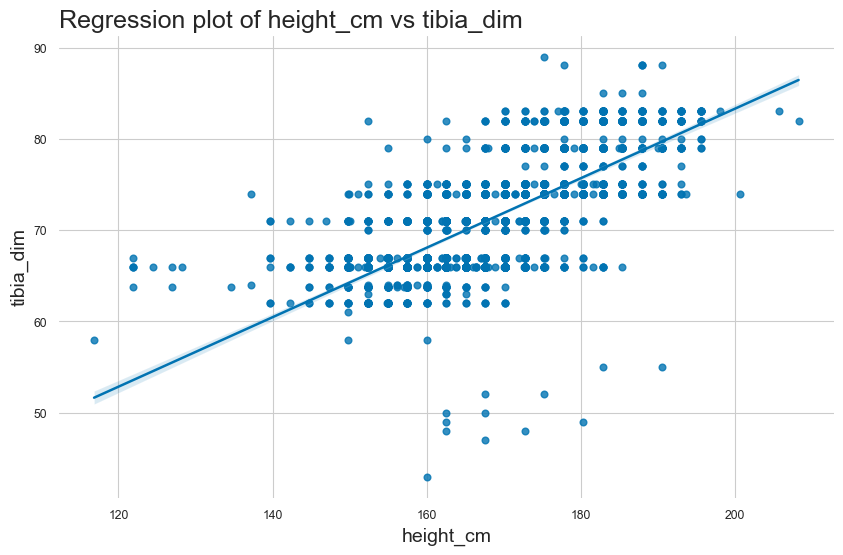

Pearson correlation between height_cm and tibia_dim: 0.713
p-value: 0.000
There is a statistically significant relationship between height_cm and tibia_dim.




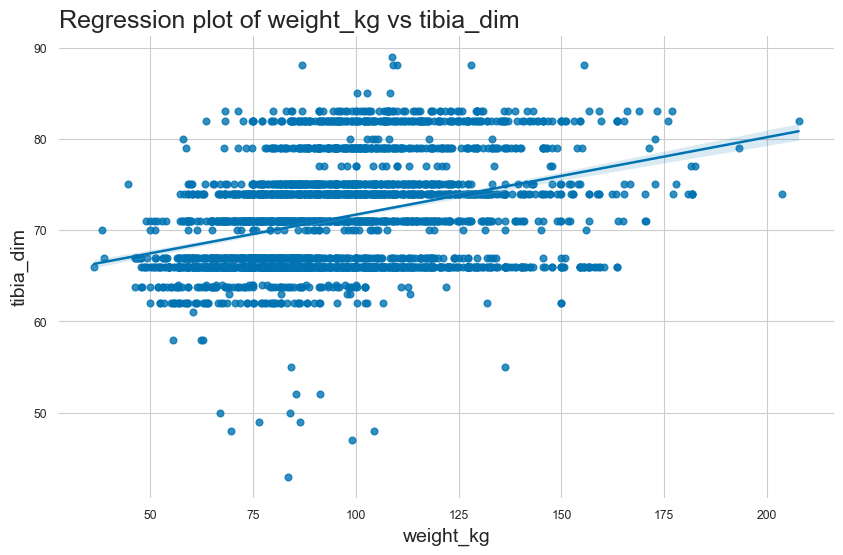

Pearson correlation between weight_kg and tibia_dim: 0.355
p-value: 0.000
There is a statistically significant relationship between weight_kg and tibia_dim.




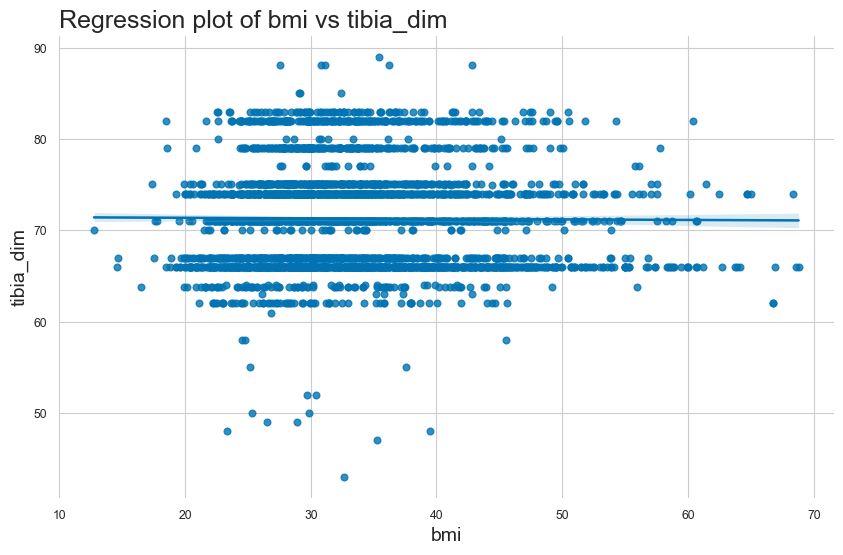

Pearson correlation between bmi and tibia_dim: -0.008
p-value: 0.639
There is no statistically significant relationship between bmi and tibia_dim.




In [9]:
# Define the features and targets
features = ['height_cm', 'weight_kg', 'bmi']
targets = ['femur_dim', 'tibia_dim']

# Call the function
plot_regression_and_test_hypothesis(train_tka, features, targets)

### Categorical-Continuous Variables

In [10]:
# Boxplot for Categorical Variables
# =============================================================================
def plot_boxplot(df, cat_vars, targets, mappings):
    for target in targets:
        for var in cat_vars:
            # Create a copy of the DataFrame
            df_copy = df.copy()

            # Replace the encoded values with their original names
            df_copy[var] = df_copy[var].map(mappings[var])

            # Create the box plot
            sns.boxplot(x=var, y=target, data=df_copy)
            plt.title(f'Box plot of {var} vs {target}', loc='left')
            sns.despine(left=True, bottom=True)  # Remove the top and right spines from plot
            plt.show()
            plt.close()
    return None

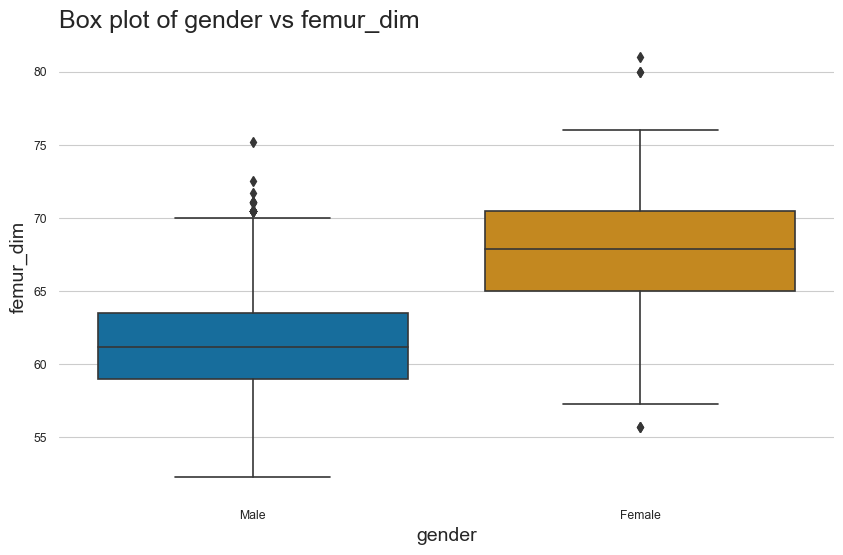

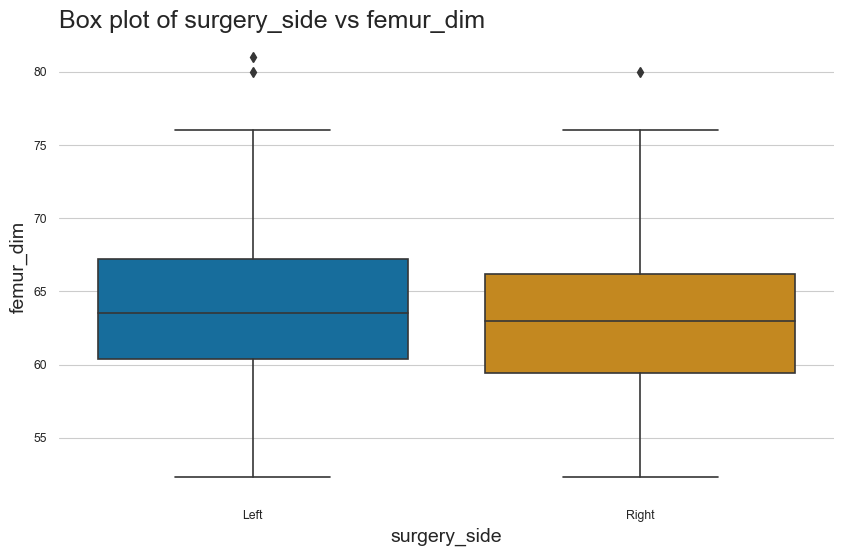

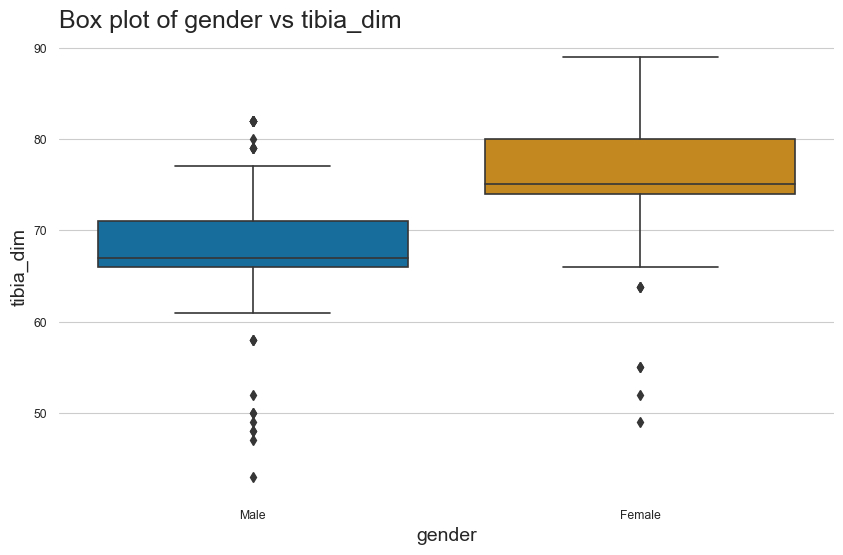

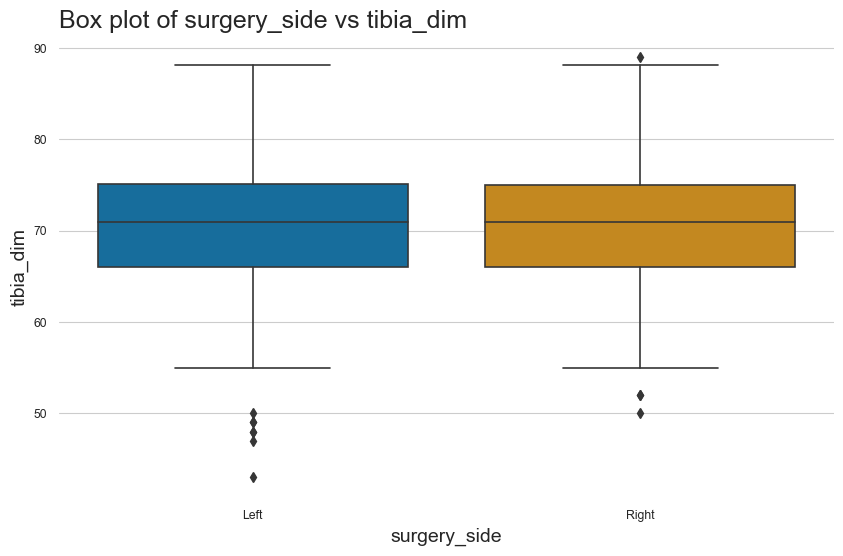

In [11]:
# Call the function
plot_boxplot(train_tka, cat_vars, targets, mappings)

In [12]:
# Perform Mann-Whitney U test
from scipy.stats import mannwhitneyu

def perform_mannwhitneyu(df, cat_vars, targets, mappings):
    for target in targets:
        for var in cat_vars:
            # Get unique categories in the variable
            categories = df[var].unique()

            # Perform Mann-Whitney U test for each combination of categories
            for i in range(len(categories)):
                for j in range(i+1, len(categories)):
                    group1 = df[df[var] == categories[i]][target]
                    group2 = df[df[var] == categories[j]][target]

                    statistic, p_value = mannwhitneyu(group1, group2)

                    # Map the encoded categories back to their original values
                    category_i = mappings[var][categories[i]]
                    category_j = mappings[var][categories[j]]

                    print(f"Mann-Whitney U test for {var} ({category_i} vs {category_j}) and {target}:")
                    print(f"Statistic: {statistic:.3f}")
                    print(f"P-value: {p_value:.3f}")

                    if p_value < 0.05:
                        print("There is a statistically significant difference between the groups.")
                    else:
                        print("There is no statistically significant difference between the groups.")

                    print("\n")
    return None

In [13]:
# Define the categorical variables and targets
cat_vars = ['gender', 'surgery_side']
targets = ['femur_dim', 'tibia_dim']

# Call the function
perform_mannwhitneyu(train_tka, cat_vars, targets, mappings)

Mann-Whitney U test for gender (Male vs Female) and femur_dim:
Statistic: 283430.000
P-value: 0.000
There is a statistically significant difference between the groups.


Mann-Whitney U test for surgery_side (Left vs Right) and femur_dim:
Statistic: 1417963.000
P-value: 0.026
There is a statistically significant difference between the groups.


Mann-Whitney U test for gender (Male vs Female) and tibia_dim:
Statistic: 205901.500
P-value: 0.000
There is a statistically significant difference between the groups.


Mann-Whitney U test for surgery_side (Left vs Right) and tibia_dim:
Statistic: 1372797.500
P-value: 0.564
There is no statistically significant difference between the groups.




## Multivariate Analysis


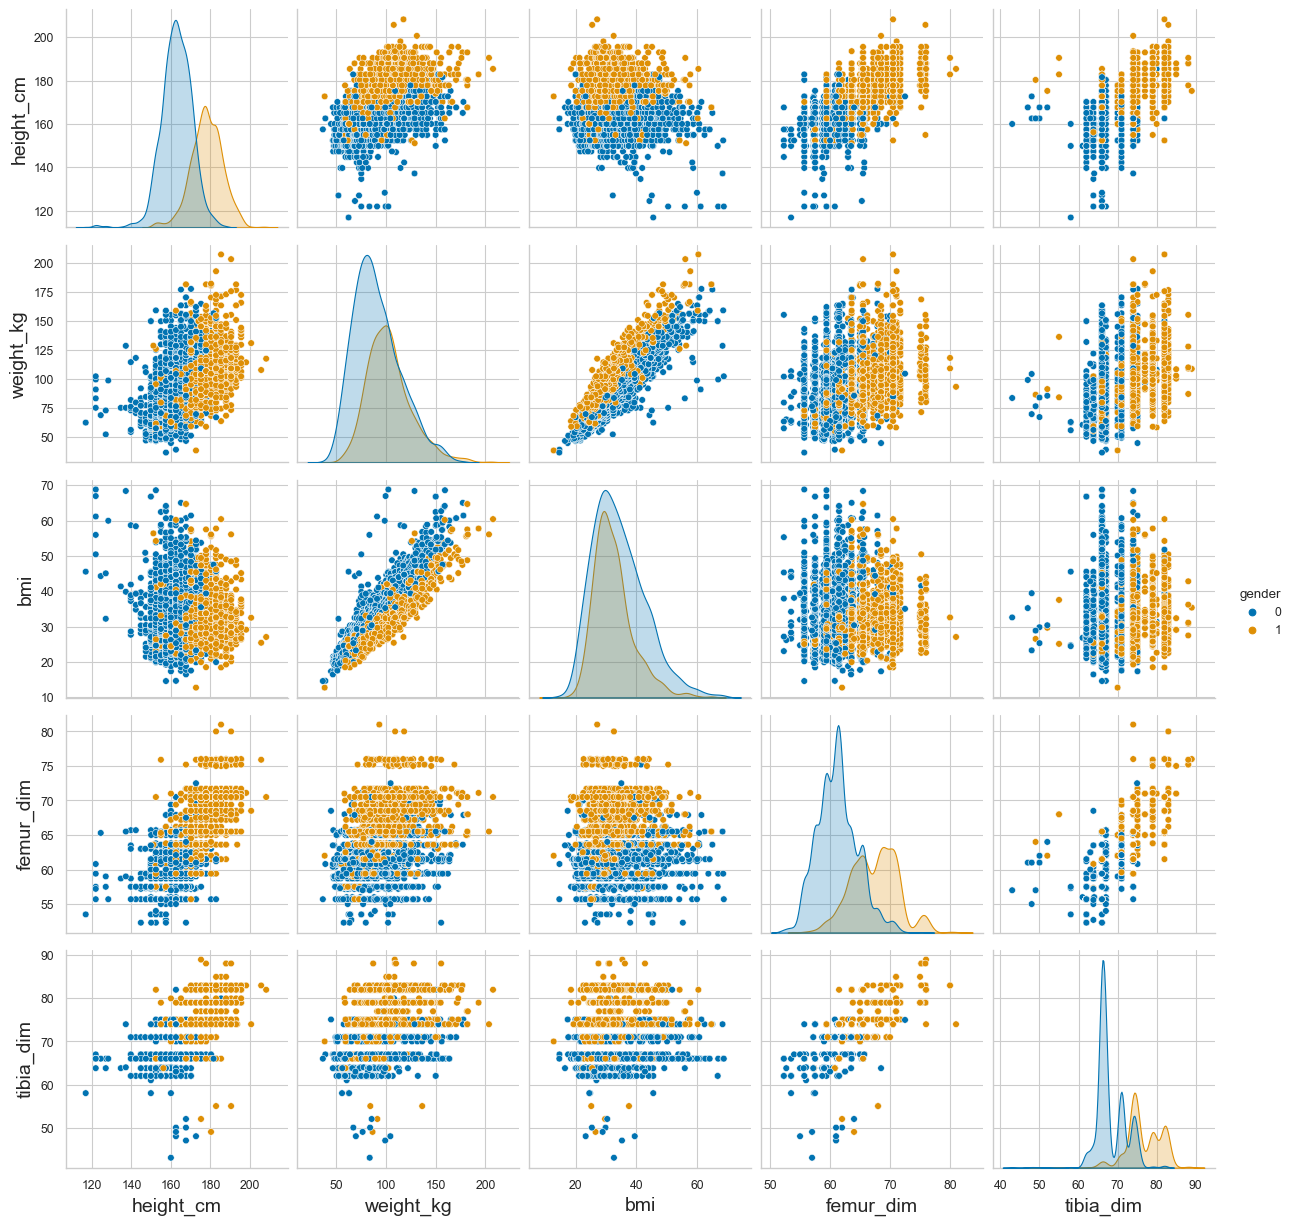

In [14]:
sns.pairplot(train_tka, vars=['height_cm', 'weight_kg', 'bmi', 'femur_dim', 'tibia_dim'], hue='gender')


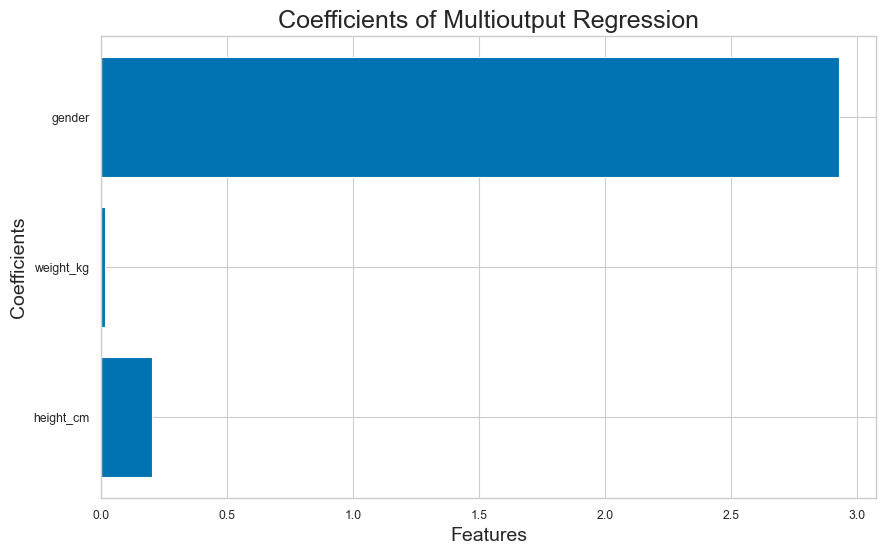

In [15]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

# Define the features and targets
features = ['height_cm', 'weight_kg', 'gender']
targets = ['femur_dim', 'tibia_dim']

# Create the multioutput regression model
model = MultiOutputRegressor(LinearRegression())

# Fit the model to the data
model.fit(train_tka[features], train_tka[targets])

# Get the coefficients
coefficients = model.estimators_[0].coef_

# Plot the coefficients
plt.barh(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Multioutput Regression')
plt.show()


Based on the analysis, the potential predictors of femur and tibia dimension are:
- `gender` (binary: Male or  Female)
- `height_cm` (continuous)
- `weight_kg` (continuous)


## Store the data for modeling


In [16]:
# Define the features and targets
features = ['gender', 'height_cm', 'weight_kg']# Features are gender, height in cm and weight in kg
targets = ['femur_dim', 'tibia_dim']# Targets are femur dimension and tibia dimension

# Create a dataframe with the features and targets
tka_df = pd.DataFrame(train_tka, columns=features + targets)
tka_df_test = pd.DataFrame(test_tka, columns=features + targets)

In [17]:
# Define the file path
file_path_train = os.path.join(r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\ForModeling', 'tka_data.csv')
file_path_test = os.path.join(r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\ForModeling', 'tka_data_test.csv')

# Save the data to the file path
tka_df.to_csv(file_path_train, index=False)
tka_df_test.to_csv(file_path_test, index=False)
print("Data saved successfully!")

Data saved successfully!
